## A simple demostration of how to run

In [1]:
import cv2
import yaml

from FaceBoxes import FaceBoxes
from TDDFA import TDDFA
from utils.functions import draw_landmarks

import matplotlib.pyplot as plt

### Load configs

In [2]:
# load config
cfg = yaml.load(open('configs/mb1_120x120.yml'), Loader=yaml.FullLoader)
tddfa = TDDFA(gpu_mode=False, **cfg)

# Initialize FaceBoxes
face_boxes = FaceBoxes()

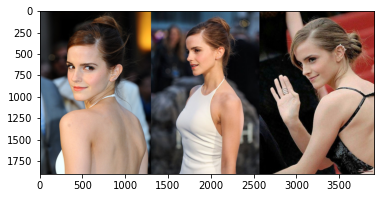

In [3]:
# given an image path
img_fp = 'examples/inputs/emma.jpg'
img = cv2.imread(img_fp)
plt.imshow(img[:, :, ::-1])

### Detect faces using FaceBoxes

In [4]:
# face detection
boxes = face_boxes(img)
print(f'Detect {len(boxes)} faces')
print(boxes)

Detect 3 faces
[[299.86682, 387.2296, 799.44354, 1045.3523, 0.9999974], [2974.7043, 304.69702, 3495.1038, 920.73175, 0.99980086], [1691.3113, 252.67686, 2041.7826, 754.593, 0.9994019]]


### Regressing 3DMM parameters, reconstruction and visualization

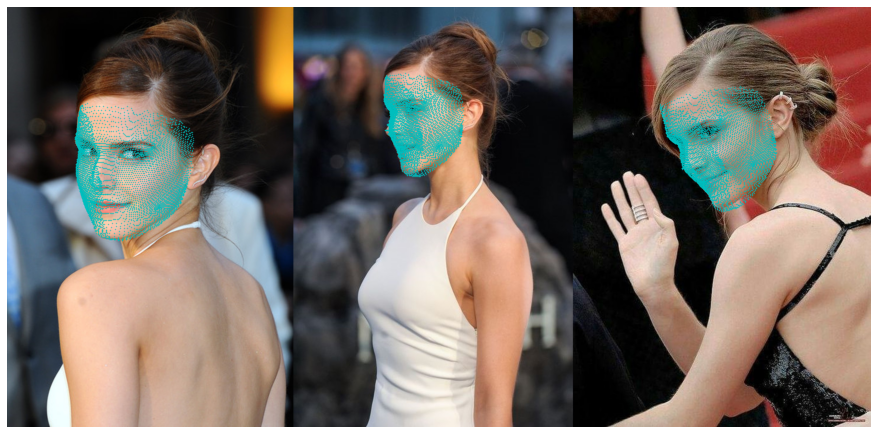

In [5]:
# regress 3DMM params
param_lst, roi_box_lst = tddfa(img, boxes)

# reconstruc vertices and visualizing dense landmarks
dense_flag = True
show_flg = True
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, show_flg=show_flg, dense_flg=dense_flag)

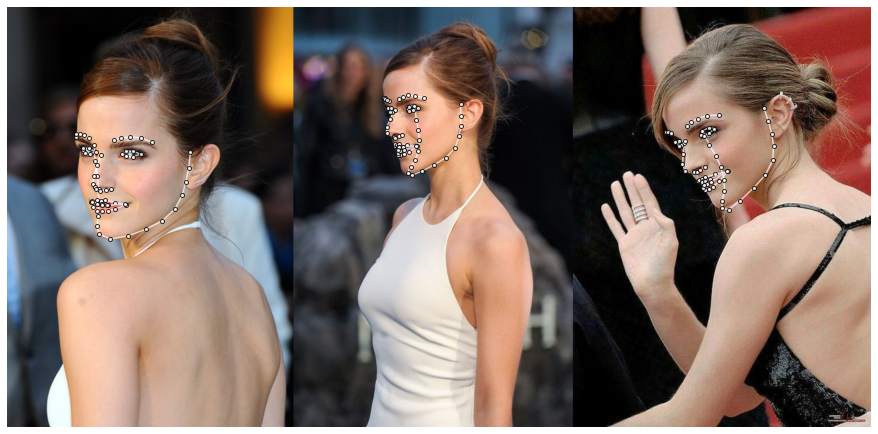

In [6]:
# reconstruc vertices and visualizing sparse landmarks
dense_flag = False
show_flg = True
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, show_flg=show_flg, dense_flg=dense_flag)